# Seminar 1 - Solutions

## Question 1

Using the same table below, answer the following questions

|  | Unemployed (Y=0) | Employed (Y=1) | Total |
| :-: | :-: | :-: | :-: | 
| Non-college grads (X=1) | 0.078 | 0.673 | 0.751 |
| College grads (X=1)| 0.042 | 0.207 | 0.249 |
| Total | 0.12 | 0.88 | 1.000 |

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

<b> a. Recreate this table in Python as a Pandas Data Frame </b>

In [3]:
# Initialize data in rows
data = [[0, 0.078, 0.673], [1, 0.042, 0.207]]

# Create the pandas DataFrame
df = pd.DataFrame(data, columns=['X', 'Y=0', 'Y=1'])

print(df)

   X    Y=0    Y=1
0  0  0.078  0.673
1  1  0.042  0.207


<b> b. Compute the marginal distribution of Y </b>

In [4]:
# Finding the marginal probabilities P(Y=0) and P(Y=1) and assigning them to the list 'marginal'
p_y0 = df['Y=0'].sum()
p_y1 = df['Y=1'].sum()

marginal = (p_y0,p_y1)

print(marginal)

(0.12, 0.88)


<b> c. Find E(Y) </b>

In [5]:
# Computing E(Y) as the dot product between X and p
E_Y = df['X']@marginal

print(E_Y)

0.88


<b> d. Find E(Y|X=0) and E(Y|X=1) </b>

In [6]:
# Obtaining the marginal probability of X
df['M_X'] = df['Y=0'] + df['Y=1']

# Obtaining P(Y=0|X=0) and P(Y=0|X=1)
py0_x = df['Y=0']/df['M_X']

# Obtaining P(Y=1|X=0) and P(Y=1|X=1)
py1_x = df['Y=1']/df['M_X']

# Obtaining the Conditional Expectations
EY_X0 = 0*py0_x[0] + 1*py1_x[0]
EY_X1 = 0*py0_x[1] + 1*py1_x[1]

print(EY_X0,EY_X1)

0.8961384820239681 0.8313253012048193


<b> e. Find the difference in means </b>

In [10]:
delta_EY_X = EY_X0 - EY_X1
print(delta_EY_X)

0.06481318081914877


## Question 2

The spreadsheet 'Age_HourlyEarnings.xlsx', contains the joint distribution of age (Age) and average hourly earnings (AHE) for 25- to 34-year-old full-time workers in 2015 with an education level that exceeds a high school diploma. Use this joint distribution to carry out the following exercises.

The dataset is used in the reference textbook Introduction to Econometrics, 4th edition (Stock and Watson).

<b>

Download the dataset [here](https://www.princeton.edu/~mwatson/Stock-Watson_3u/Students/EE_Datasets/Age_HourlyEarnings.xlsx)
</b>

In [11]:
ahe = pd.read_excel('Age_HourlyEarnings.xlsx')

C:\ProgramData\Anaconda3\lib\site-packages\openpyxl\worksheet\_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


In [12]:
ahe

,AHE,Age_25,Age_26,Age_27,Age_28,Age_29,Age_30,Age_31,Age_32,Age_33,Age_34
0,5,0.002980,0.002180,0.002035,0.002108,0.001454,0.001526,0.001308,0.001018,0.001454,0.001018
1,6,0.001163,0.001672,0.001090,0.001090,0.001308,0.001090,0.000509,0.001744,0.001018,0.001236
2,7,0.002471,0.002616,0.002544,0.001672,0.002835,0.002398,0.001744,0.001890,0.002035,0.001817
3,8,0.002398,0.002253,0.001672,0.002398,0.001381,0.002762,0.002180,0.001744,0.002108,0.002253
4,9,0.003561,0.003271,0.002835,0.002907,0.003198,0.002398,0.002616,0.001962,0.003053,0.002035
5,10,0.005160,0.005233,0.003997,0.005233,0.004433,0.004506,0.004579,0.004143,0.004797,0.003634
6,11,0.003779,0.004506,0.003997,0.003779,0.003707,0.002689,0.002616,0.003489,0.002835,0.003343
7,12,0.007559,0.007341,0.007413,0.006977,0.007050,0.007268,0.007195,0.006687,0.005742,0.006614
8,13,0.003707,0.003489,0.003634,0.003561,0.004288,0.004433,0.002762,0.003707,0.003925,0.003925
9,14,0.005742,0.006687,0.006032,0.006977,0.006905,0.006614,0.006468,0.005742,0.005233,0.006614


<b> a. Compute the marginal distribution of Age<b/>

In [13]:
age_table = ahe.iloc[:,ahe.columns != 'AHE']
age_table

,Age_25,Age_26,Age_27,Age_28,Age_29,Age_30,Age_31,Age_32,Age_33,Age_34
0,0.002980,0.002180,0.002035,0.002108,0.001454,0.001526,0.001308,0.001018,0.001454,0.001018
1,0.001163,0.001672,0.001090,0.001090,0.001308,0.001090,0.000509,0.001744,0.001018,0.001236
2,0.002471,0.002616,0.002544,0.001672,0.002835,0.002398,0.001744,0.001890,0.002035,0.001817
3,0.002398,0.002253,0.001672,0.002398,0.001381,0.002762,0.002180,0.001744,0.002108,0.002253
4,0.003561,0.003271,0.002835,0.002907,0.003198,0.002398,0.002616,0.001962,0.003053,0.002035
5,0.005160,0.005233,0.003997,0.005233,0.004433,0.004506,0.004579,0.004143,0.004797,0.003634
6,0.003779,0.004506,0.003997,0.003779,0.003707,0.002689,0.002616,0.003489,0.002835,0.003343
7,0.007559,0.007341,0.007413,0.006977,0.007050,0.007268,0.007195,0.006687,0.005742,0.006614
8,0.003707,0.003489,0.003634,0.003561,0.004288,0.004433,0.002762,0.003707,0.003925,0.003925
9,0.005742,0.006687,0.006032,0.006977,0.006905,0.006614,0.006468,0.005742,0.005233,0.006614


In [14]:
marginal = age_table.sum()
marginal

Age_25    0.084890
Age_26    0.092231
Age_27    0.085471
Age_28    0.093393
Age_29    0.103496
Age_30    0.104731
Age_31    0.103932
Age_32    0.108075
Age_33    0.108802
Age_34    0.114979
dtype: float64

<b> b. Compute the mean of AHE for each value of Age; that is, compute, E(AHE|Age = 25), and so forth </b>

In [15]:
import numpy as np

sum_prod = []
cond_exp = np.empty((10, 1))

for i in range(10):
    sum_prod = ahe.AHE * age_table.iloc[:,i] / marginal[i]
    cond_exp[i] = sum_prod.sum()

cond_exp = pd.DataFrame(cond_exp)

cond_exp

,0
0,17.590751
1,18.966904
2,19.704933
3,20.235802
4,21.171353
5,21.784871
6,22.595105
7,23.692000
8,23.348695
9,24.108092


<b> c. Compute and plot the mean of AHE versus Age. Are average hourly earnings and age related? Explain. <b/>

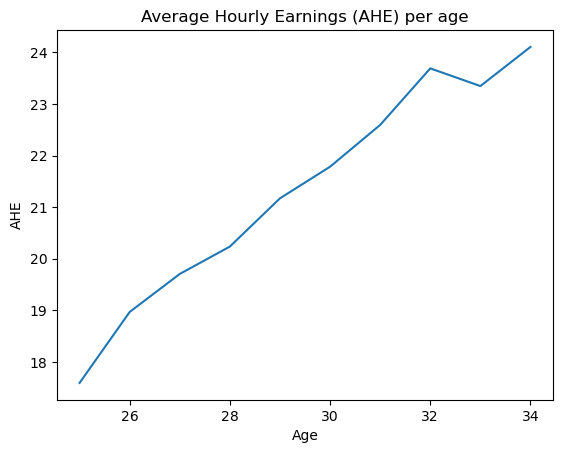

In [16]:
age = (25,26,27,28,29,30,31,32,33,34)

plt.plot(age, cond_exp)

plt.title("Average Hourly Earnings (AHE) per age")
plt.xlabel("Age")
plt.ylabel("AHE")

plt.show()